In [1]:
import pandas as pd
import numpy as np
import json
import random
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score
from sklearn.metrics import average_precision_score,plot_precision_recall_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve, auc

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.decomposition import PCA

import clean_text as ct
from gensim.models import KeyedVectors, Word2Vec
from sklearn.linear_model import LogisticRegression

In [2]:
tweets = pd.read_csv('climate_change_tweets_sample-2020-05-16-17-57.csv')
tweets.head()

,username,user_handle,date,retweets,favorites,text,label
0,WWF Climate & Energy,climateWWF,2020-04-28,11,22,Economic recovery and national climate pledges...,0
1,WWF Climate & Energy,climateWWF,2020-04-22,6,16,"In this difficult time, it’s hard to connect w...",0
2,WWF Climate & Energy,climateWWF,2020-04-01,43,69,"The decision to postpone # COP26, is unavoidab...",0
3,WWF Climate & Energy,climateWWF,2020-03-30,24,30,Japan - the world’s fifth largest emitter of g...,0
4,WWF Climate & Energy,climateWWF,2020-03-30,22,40,How can countries include # NatureBasedSolutio...,0


In [3]:
clean_text = ct.CleanText()
tweets["text"] = clean_text.transform_no_stem(tweets.text)
tweets = tweets.loc[(~tweets.text.isnull()), :]
tweets.head()

,username,user_handle,date,retweets,favorites,text,label
0,WWF Climate & Energy,climateWWF,2020-04-28,11,22,economic recovery national climate pledges mus...,0
1,WWF Climate & Energy,climateWWF,2020-04-22,6,16,difficult time hard connect natural world eart...,0
2,WWF Climate & Energy,climateWWF,2020-04-01,43,69,decision postpone cop unavoidable collective p...,0
3,WWF Climate & Energy,climateWWF,2020-03-30,24,30,japan worlds fifth largest emitter greenhouse ...,0
4,WWF Climate & Energy,climateWWF,2020-03-30,22,40,countries include naturebasedsolutions climate...,0


#### Embedder

In [4]:
###you have to download the pre-trained vectorizer at: https://fasttext.cc/docs/en/english-vectors.html

model = 'wiki-news-300d-1M.vec'

model_emb = KeyedVectors.load_word2vec_format(model, binary=False)

# import gensim.downloader as api
# model_emb = api.load(model)

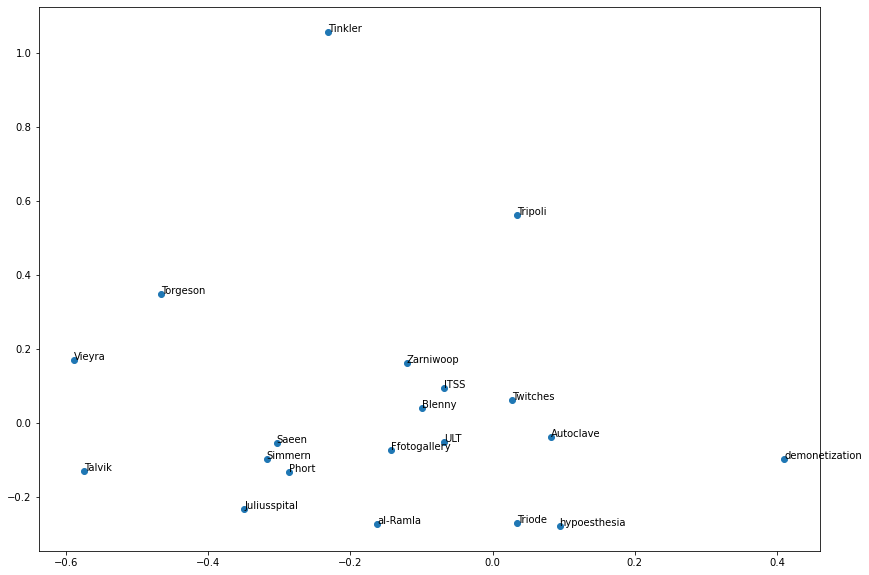

In [17]:
plt.figure(figsize=(14, 10))

res = random.sample(range(1, len(model_emb.vocab)), 20) 

vocab = model_emb[model_emb.vocab]
pca = PCA(n_components=2)
pca_results = pca.fit_transform(vocab)

plt.scatter(pca_results[res, 0], pca_results[res, 1])

words = list(model_emb.vocab)

for i, word in enumerate(words):
    if i in res:
        plt.annotate(word[:], xy=(pca_results[i, 0], pca_results[i, 1]))
plt.show()

In [5]:
def Word2VectorizeTweet(tweet):
    tweet_vector = np.zeros(shape=(300,), dtype="float32")
    n_vectorizable = 0
    for word in tweet.split():
        try:
#             print(f"Adding {word} to word representation")
            tweet_vector = np.add(tweet_vector, model_emb.get_vector(word))
            n_vectorizable += 1
        except KeyError:
            print(f"Could not vectorize {word}")
    return (tweet_vector/n_vectorizable)

In [6]:
tweets["FastText"] = tweets.text.apply(func=Word2VectorizeTweet)

Could not vectorize manupulgarvidal
Could not vectorize petersbergclimatedialogue
Could not vectorize bmu
Could not vectorize christoph
Could not vectorize earthday
Could not vectorize manupulgarvidal
Could not vectorize wwfmedia
Could not vectorize vperezcirera
Could not vectorize climateaction
Could not vectorize manupulgarvidal
Could not vectorize naturebasedsolutions
Could not vectorize ndcs
Could not vectorize worldwildlife
Could not vectorize climateambition
Could not vectorize wwfjapan
Could not vectorize manupulgarvidal
Could not vectorize ndcs
Could not vectorize climateaction
Could not vectorize manupulgarvidal
Could not vectorize vperezcirera
Could not vectorize naturedeal
Could not vectorize ndcs
Could not vectorize climatecrisis
Could not vectorize wwfmedia
Could not vectorize manupulgarvidal
Could not vectorize vperezcirera
Could not vectorize wwfjapan
Could not vectorize climateambition
Could not vectorize topnigel
Could not vectorize climatewwf
Could not vectorize gmuno

Could not vectorize parisagreement
Could not vectorize livingamazon
Could not vectorize earthhour
Could not vectorize endangeredemoji
Could not vectorize endangeredemoji
Could not vectorize adelie
Could not vectorize frackfree
Could not vectorize keepitintheground
Could not vectorize oilcrash
Could not vectorize justrecovery
Could not vectorize justrecovery
Could not vectorize alexsobel
Could not vectorize carolinelucas
Could not vectorize simonclarkemp
Could not vectorize justrecovery
Could not vectorize ipccch
Could not vectorize rharrabin
Could not vectorize antonioguterres
Could not vectorize earthday
Could not vectorize covid
Could not vectorize actonclimate
Could not vectorize covid
Could not vectorize cmmonwealth
Could not vectorize transdayofvisibility
Could not vectorize marsha
Could not vectorize covid
Could not vectorize barclaysshutdown
Could not vectorize morten
Could not vectorize thaysen
Could not vectorize barclaysshutdown
Could not vectorize covid
Could not vectorize f

Could not vectorize paulinehansonoz
Could not vectorize cmdangelo
Could not vectorize attenborough
Could not vectorize romm
Could not vectorize climateprogress
Could not vectorize attenboroughs
Could not vectorize bbcone
Could not vectorize laurzm
Could not vectorize theipaper
Could not vectorize attenborough
Could not vectorize adamvaughanuk
Could not vectorize sciencemagazine
Could not vectorize fridaysforfuture
Could not vectorize climatestrike
Could not vectorize attenborough
Could not vectorize climatechangethefacts
Could not vectorize ugency
Could not vectorize meehancrist
Could not vectorize steeletalk
Could not vectorize globalnews
Could not vectorize kashmiragander
Could not vectorize darkshark
Could not vectorize corbettjessica
Could not vectorize georgemonbiot
Could not vectorize gretathunberg
Could not vectorize billmckibben
Could not vectorize margaretatwood
Could not vectorize sciencedirect
Could not vectorize daveschlom
Could not vectorize nsprnews
Could not vectorize bl

Could not vectorize rheasuh
Could not vectorize lunderwood
Could not vectorize shailenewoodley
Could not vectorize teletown
Could not vectorize governorva
Could not vectorize sierraclub
Could not vectorize eenewsupdates
Could not vectorize coalworkers
Could not vectorize sierraclub
Could not vectorize jasoncrowco
Could not vectorize clubis
Could not vectorize copolitics
Could not vectorize ncgovernor
Could not vectorize evanhalper
Could not vectorize mikelevinca
Could not vectorize yeson
Could not vectorize yeson
Could not vectorize harleyrouda
Could not vectorize danarohrabacher
Could not vectorize novemberiscoming
Could not vectorize sierraclub
Could not vectorize jasoncrowco
Could not vectorize sierraclub
Could not vectorize copolitics
Could not vectorize blackrock
Could not vectorize climateweeknyc
Could not vectorize sierraclub
Could not vectorize michaelemann
Could not vectorize sunrisemvmt
Could not vectorize elonmusk
Could not vectorize sierraclub
Could not vectorize pruitt
Cou

Could not vectorize veranstaltungen
Could not vectorize gelistet
Could not vectorize raisedfist
Could not vectorize raisedfist
Could not vectorize nakabuyehildaf
Could not vectorize thefuturewewant
Could not vectorize fridaysforfuture
Could not vectorize howdareyou
Could not vectorize fridaysforfuture
Could not vectorize merkeltellthetruth
Could not vectorize merkeltellthetruth
Could not vectorize globalclimatestrike
Could not vectorize globalclimatestrike
Could not vectorize fridaysforfuture
Could not vectorize writersforfuture
Could not vectorize kolloquium
Could not vectorize klettcottatweet
Could not vectorize tropenverlag
Could not vectorize globalen
Could not vectorize klimastreik
Could not vectorize raisedfist
Could not vectorize climateactionchallenge
Could not vectorize climatehuman
Could not vectorize stephenathome
Could not vectorize victoryhand
Could not vectorize donnerstag
Could not vectorize inspirierenden
Could not vectorize aktivist
Could not vectorize kirchentag
Could

Could not vectorize ilhanmn
Could not vectorize edwardnorton
Could not vectorize senmarkey
Could not vectorize fridaysfuture
Could not vectorize firedrillfriday
Could not vectorize naomiaklein
Could not vectorize onemillionofus
Could not vectorize gretathunberg
Could not vectorize abcashlie
Could not vectorize onemillionofus
Could not vectorize abcgmw
Could not vectorize onemillionofus
Could not vectorize earthday
Could not vectorize earthrise
Could not vectorize earthday
Could not vectorize mckibben
Could not vectorize billmckibben
Could not vectorize divestfromfossilfuels
Could not vectorize newyorker
Could not vectorize billmckibben
Could not vectorize newyorker
Could not vectorize onemillionofus
Could not vectorize usrepkcastor
Could not vectorize climatecrisis
Could not vectorize unitebehindthescience
Could not vectorize fridaysfuture
Could not vectorize fridaysforfuture
Could not vectorize recyclingsymbolbalancescaleglobeshowingamericasglobeshowingeurope
Could not vectorize afric

Could not vectorize exxonmobil
Could not vectorize thisiszerohour
Could not vectorize youthtopower
Could not vectorize shaimaakhalil
Could not vectorize drvandanashiva
Could not vectorize thisiszerohour
Could not vectorize halsey
Could not vectorize iambeckyg
Could not vectorize avamax
Could not vectorize dualipa
Could not vectorize mtvema
Could not vectorize globeshowingamericas
Could not vectorize mtvemas
Could not vectorize climatejustice
Could not vectorize egaconnects
Could not vectorize thisiszerohour
Could not vectorize thisiszerohour
Could not vectorize youthtopower
Could not vectorize gettotheroots
Could not vectorize bbcwomen
Could not vectorize bbcworld
Could not vectorize gretathunberg
Could not vectorize victbarrett
Could not vectorize xryouth
Could not vectorize extinctionrebellion
Could not vectorize voteourfuture
Could not vectorize climatetour
Could not vectorize thisiszerohour
Could not vectorize youthtopower
Could not vectorize egaconnects
Could not vectorize thisisz

Could not vectorize techhsoc
Could not vectorize coralsncaves
Could not vectorize americanresistanceunitedstates
Could not vectorize techhsoc
Could not vectorize icymi
Could not vectorize fridayforfuture
Could not vectorize echochambers
Could not vectorize lorienjasny
Could not vectorize echochambers
Could not vectorize lorienjasny
Could not vectorize climatestrike
Could not vectorize americanresistanceunitedstates
Could not vectorize bsosumd
Could not vectorize lorienjasny
Could not vectorize amyaharder
Could not vectorize axios
Could not vectorize echochambers
Could not vectorize bsosumd
Could not vectorize asanews
Could not vectorize ssnscholars
Could not vectorize macfound
Could not vectorize thomsenjorgen
Could not vectorize mvodopic
Could not vectorize fernandotormos
Could not vectorize pseumd
Could not vectorize joebiden
Could not vectorize sunrisemvmt
Could not vectorize youthvgov
Could not vectorize usclimatestrike
Could not vectorize futurecoalition
Could not vectorize friday

Could not vectorize parisagreement
Could not vectorize amyaharder
Could not vectorize socialscience
Could not vectorize pruitt
Could not vectorize rlmiller
Could not vectorize climateresistance
Could not vectorize brownenvsoc
Could not vectorize theresistance
Could not vectorize trumpadministration
Could not vectorize parisagreement
Could not vectorize cleanenergy
Could not vectorize energyefficiency
Could not vectorize brownenvsoc
Could not vectorize theresistance
Could not vectorize climateresistance
Could not vectorize datavisualization
Could not vectorize trumpadministration
Could not vectorize cleanenergy
Could not vectorize solarenergy
Could not vectorize backhandindexpointingright
Could not vectorize thehill
Could not vectorize trumpsamerica
Could not vectorize theresistance
Could not vectorize uschamber
Could not vectorize carbontax
Could not vectorize icymi
Could not vectorize voxdotcom
Could not vectorize cleanpowerplan
Could not vectorize macfound
Could not vectorize thomsen

Could not vectorize tuvalu
Could not vectorize tuvalu
Could not vectorize tednordhaus
Could not vectorize prosyn
Could not vectorize environmentlow
Could not vectorize abroaddoes
Could not vectorize covid
Could not vectorize timesman
Could not vectorize alexberenson
Could not vectorize crichton
Could not vectorize lovelock
Could not vectorize dailycaller
Could not vectorize fdrlst
Could not vectorize dcexaminer
Could not vectorize heathermacdona
Could not vectorize collegefix
Could not vectorize holman
Could not vectorize aminterest
Could not vectorize powerlineus
Could not vectorize irma
Could not vectorize theoryirma
Could not vectorize jacoby
Could not vectorize anwr
Could not vectorize djt
Could not vectorize lilley
Could not vectorize johnsullivanp
Could not vectorize doesntrademarkt
Could not vectorize johnsullivanp
Could not vectorize worstall
Could not vectorize existtrademark
Could not vectorize gwpf
Could not vectorize bbcbreakfast
Could not vectorize untrademarks
Could not v

Could not vectorize denierstrademark
Could not vectorize breitbartnews
Could not vectorize bbcnews
Could not vectorize covid
Could not vectorize covid
Could not vectorize cying
Could not vectorize rbcs
Could not vectorize attenborough
Could not vectorize earthday
Could not vectorize earthday
Could not vectorize wattsupwiththat
Could not vectorize sthandweather
Could not vectorize climatedepot
Could not vectorize jonova
Could not vectorize fxnscitech
Could not vectorize tallbloke
Could not vectorize fenbeagle
Could not vectorize jonova
Could not vectorize marita
Could not vectorize townhallcom
Could not vectorize abcthedrum
Could not vectorize dcexaminer
Could not vectorize addthis
Could not vectorize climaterealists
Could not vectorize climaterealists
Could not vectorize climatedepot
Could not vectorize climaterealists
Could not vectorize wordpressdotcom
Could not vectorize climatedepot
Could not vectorize climaterealists
Could not vectorize climatedepot
Could not vectorize montford
Co

Could not vectorize bbcbreakfast
Could not vectorize wordpressdotcom
Could not vectorize sharethis
Could not vectorize wattsupwiththat
Could not vectorize ecowatch
Could not vectorize belfer
Could not vectorize internati
Could not vectorize breitbartnews
Could not vectorize bbcnews
Could not vectorize psiintl
Could not vectorize jonova
Could not vectorize joannenova
Could not vectorize sharethis
Could not vectorize psiintl
Could not vectorize tvtrademarks
Could not vectorize sharethis
Could not vectorize pseudosciencetrademark
Could not vectorize dailycaller
Could not vectorize sianweather
Could not vectorize huwstephens
Could not vectorize psiintl
Could not vectorize denierstrademark
Could not vectorize facttrademark
Could not vectorize dailycaller
Could not vectorize climatedisruption
Could not vectorize cfact
Could not vectorize pseudosciencetrademark
Could not vectorize pitchtrademark
Could not vectorize hunttrademark
Could not vectorize sharethis
Could not vectorize breitbartnews


Could not vectorize climatedepot
Could not vectorize sads
Could not vectorize dailycaller
Could not vectorize pruitt
Could not vectorize envirofascism
Could not vectorize wordpressdotcom
Could not vectorize cfact
Could not vectorize cantrademarkt
Could not vectorize earthday
Could not vectorize koonin
Could not vectorize teamtrademark
Could not vectorize changetrademark
Could not vectorize chrisenloe
Could not vectorize theblaze
Could not vectorize ivankatrademarks
Could not vectorize madnesstrademark
Could not vectorize wattsupwiththat
Could not vectorize junkscience
Could not vectorize theytrademarkve
Could not vectorize greentrademark
Could not vectorize theblaze
Could not vectorize impossibletrademark
Could not vectorize peoplesclimatemarch
Could not vectorize peopletrademarks
Could not vectorize peopletrademarks
Could not vectorize psiintl
Could not vectorize climatedepot
Could not vectorize delingpole
Could not vectorize changetrademark
Could not vectorize physicis
Could not vect

Could not vectorize tcot
Could not vectorize tlot
Could not vectorize arnett
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize morano
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize loehle
Could not vectorize iccc
Could not vectorize loehle
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize loehle
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize tcot
Could not vectorize tlot
Could not vectorize iccc
Could not vectorize iccc
Could not vectorize tcot
Could not vecto

Could not vectorize romm
Could not vectorize holdren
Could not vectorize smartgrid
Could not vectorize forwardonclimate
Could not vectorize kerrytrademarks
Could not vectorize snowquester
Could not vectorize snowquester
Could not vectorize notaskeptic
Could not vectorize lynas
Could not vectorize civilizationtrademark
Could not vectorize metoffice
Could not vectorize uea
Could not vectorize warmism
Could not vectorize realitydrop
Could not vectorize obamacrat
Could not vectorize ucalgary
Could not vectorize mckibben
Could not vectorize delingpole
Could not vectorize duluth
Could not vectorize junkscience
Could not vectorize realscience
Could not vectorize trenberth
Could not vectorize cfcs
Could not vectorize uwaterloo
Could not vectorize bigjoebastardi
Could not vectorize okla
Could not vectorize durbin
Could not vectorize nonsensus
Could not vectorize climateprogress
Could not vectorize accum
Could not vectorize vitter
Could not vectorize zapruder
Could not vectorize warmism
Could no

Could not vectorize realdonaldtrump
Could not vectorize realdonaldtrump
Could not vectorize nbcbayarea
Could not vectorize warmingtrademark
Could not vectorize wastefeul
Could not vectorize realdonaldtrump


In [7]:
tweets.FastText

0        [0.03186667, -0.03795556, -0.0264, -0.01622222...
1        [-0.03798667, -0.0041800006, -0.07699334, -0.0...
2        [0.03681905, -0.024242856, -0.039119046, -0.01...
3        [0.038795236, -0.017895237, 0.022438098, -0.02...
4        [-0.059466667, 0.0034222228, -0.029488891, 0.0...
                               ...                        
18004    [0.014666665, 0.02447778, 0.016066667, 0.01008...
18005    [-0.07187144, 0.003985713, -0.025528576, -0.03...
18006    [-0.043033335, 0.0246, 0.038516667, -0.0425499...
18007    [0.046475004, -0.043416664, 0.041641664, -0.01...
18008    [0.033633333, -0.050566673, -0.015666666, -0.0...
Name: FastText, Length: 18009, dtype: object

In [8]:
print(tweets.shape)

(18009, 8)


#### Remove NaN

In [9]:
print(tweets.shape)
tweets['FastTextNan'] = tweets['FastText']
tweets['FastTextNan'] = np.array([k.tolist() for k in tweets.FastText.values]) 
print(tweets.shape)

(18009, 8)
(18009, 9)


In [10]:
print(tweets.shape)

tweets.dropna(inplace=True)

print(tweets.shape)

(18009, 9)
(18005, 9)


### Training of the Model

In [11]:
X = np.array([k.tolist() for k in tweets.FastText.values])

X_train, X_test, y_train, y_test = train_test_split(X, tweets.label.values, 
                                                    test_size=0.2, random_state=17, 
                                                    shuffle=True) # explicit default

[print(dat[:3], dat.shape, end="\n"*2) for dat in [X_train, X_test, y_train, y_test]];



[[ 1.26800034e-02  1.76800005e-02 -2.49999901e-03 -1.36100007e-02
  -8.79999541e-04 -1.70001018e-04  2.38000159e-03 -1.74100008e-02
   1.16499998e-02 -5.92000075e-02  1.51399998e-02  4.77399975e-02
   4.69699986e-02  1.19599979e-02 -6.70999885e-02  2.52000000e-02
   2.43699998e-02 -4.35900018e-02 -2.34199967e-02 -2.72199996e-02
  -8.21300000e-02  3.55799980e-02  3.35000013e-03  4.27099988e-02
  -6.98999986e-02 -1.20500000e-02  8.49998731e-04 -6.07700050e-02
   8.17999896e-03 -8.47999938e-03  1.80599988e-02 -1.29000004e-02
   1.16099995e-02 -4.53399979e-02  2.28800029e-02 -1.45200016e-02
  -8.94000195e-03 -4.12999932e-03  6.50800020e-02 -4.34999820e-03
   8.41999985e-03 -1.83299985e-02  3.33900005e-02 -1.35099981e-02
  -2.73000002e-02  1.30300000e-02 -1.74499992e-02 -2.74999980e-02
  -4.36399952e-02 -1.50000025e-03 -8.45600069e-02  1.38399992e-02
  -7.02290058e-01 -6.98000053e-03  4.40899990e-02 -2.28699986e-02
  -4.05699983e-02 -9.01000015e-03 -1.90600008e-02 -1.01099983e-02
  -1.26399

In [12]:
X_train.shape

(14404, 300)

In [14]:
params = {'C':1, 'max_iter':1000, 'multi_class' :"ovr", 'solver':'saga'}


model = LogisticRegression(**params) # use all CPUs

model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', solver='saga')

In [15]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8636489863926687

Average precision-recall score: 0.94


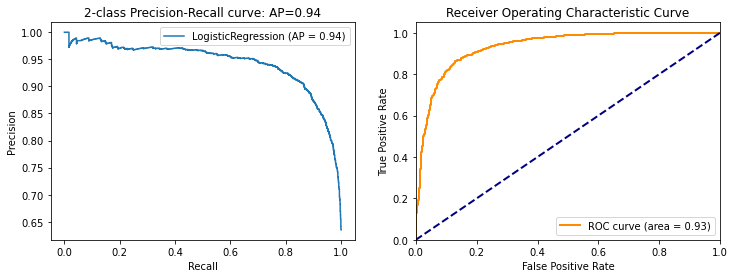

In [16]:
y_score = model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
disp = plot_precision_recall_curve(model, X_test, y_test,ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
axes[0].legend(loc="upper right")


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#plt.figure()
lw = 2
axes[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic Curve')
axes[1].legend(loc="lower right")
plt.show()